In [ ]:
# Instalar paquetes necesarios:
# !pip install pandas
# !pip install numpy
# !pip install ipykernel
# !pip install matplotlib
# !pip install seaborn
# !pip install plotly_express 
#%pip install pandas
#%matplotlib inline

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
import datetime
import warnings
# Se importa la librería de KaggleHub para descargar datasets para la práctica
# Se debe instalar la librería con el comando: pip install kagglehub
import kagglehub


In [ ]:
# Se establecio el path de la carpeta donde se descargan los datasets de KaggleHub la ultima version
path = kagglehub.dataset_download("vivek468/superstore-dataset-final")

# El Dataset a usar es el 'Sample - Superstore.csv'
archivo = path + '\\' + 'Sample - Superstore.csv'

In [ ]:
# Para evitar que se muestren advertencias innecesarias en la salida usaremos warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore')

In [ ]:
# Cargar el dataset a la variable df que sera nuestro DataFrame.
df=pd.read_csv(archivo,encoding='ISO-8859-1')

In [ ]:
# usamos df.info() para ver la información del DataFrame
df.info()

In [19]:
# usamos df.head() para ver las primeras filas del DataFrame
df.head()  

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [20]:
 
# usamos df.describe() para ver un resumen estadístico de las columnas numéricas del DataFrame
df.describe()   


,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [21]:
# usamos df.columns para ver los nombres de las columnas del DataFrame
df.columns  


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [22]:
# usamos df.shape para ver las dimensiones del DataFrame
df.shape    


(9994, 21)

In [23]:
# usamos df.isnull().sum() para ver la cantidad de valores nulos en cada columna del DataFrame
df.isnull().sum() 

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [24]:
  
# usamos df.duplicated().sum() para ver la cantidad de filas duplicadas en el DataFrame
df.duplicated().sum()   


np.int64(0)

In [25]:
# usamos df['ColumnName'].unique() para ver los valores únicos de una columna específica
df['Category'].unique()


array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [26]:
# usamos df['ColumnName'].value_counts() para ver la cantidad de ocurrencias de cada valor en una columna específica
df['Category'].value_counts()       


Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

In [27]:
# usamos df['ColumnName'].nunique() para ver la cantidad de valores únicos en una columna específica
df['Category'].nunique()


3

<Axes: xlabel='Category'>

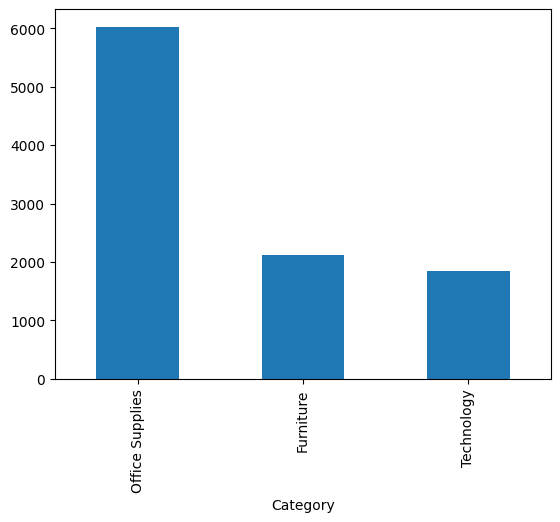

In [28]:
# usamos df['ColumnName'].value_counts().plot(kind='bar') para graficar la cantidad de ocurrencias de cada valor en una columna específica
df['Category'].value_counts().plot(kind='bar')


<Axes: ylabel='count'>

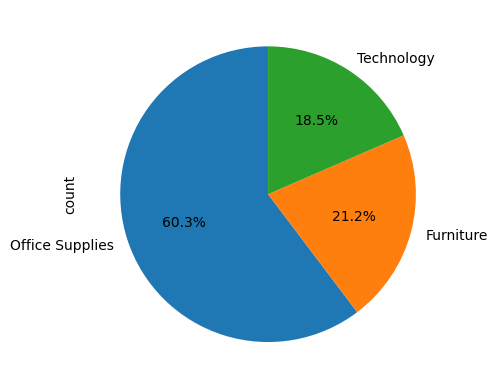

In [29]:
# usamos df['ColumnName'].value_counts().plot(kind='pie') para graficar la cantidad de ocurrencias de cada valor en una columna específica
df['Category'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)


<Axes: xlabel='Category', ylabel='count'>

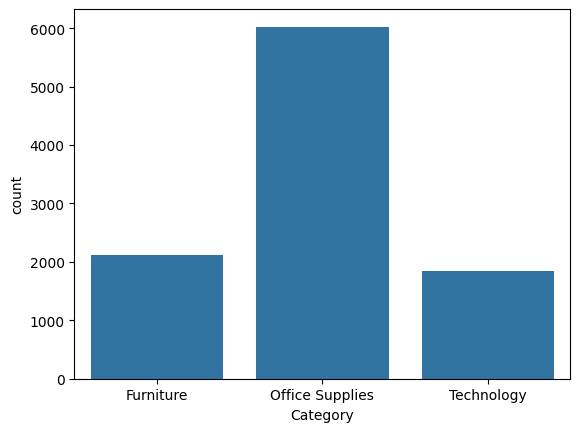

In [30]:
# usamos sns.countplot(x='ColumnName', data=df) para graficar la cantidad de ocurrencias de cada valor en una columna específica
sns.countplot(x='Category', data=df)        


<Axes: xlabel='Sales'>

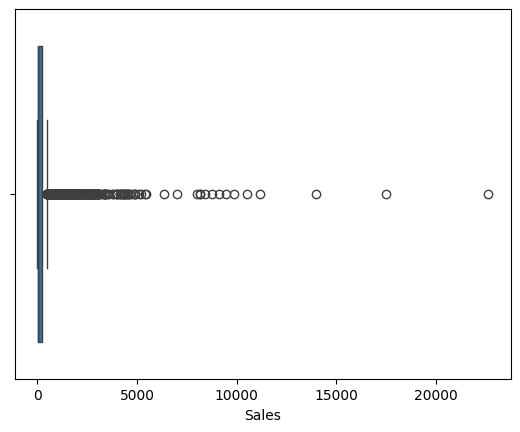

In [31]:
# usamos sns.boxplot(x='ColumnName', data=df) para graficar un boxplot de una columna específica
sns.boxplot(x='Sales', data=df)


<Axes: xlabel='Sales', ylabel='Profit'>

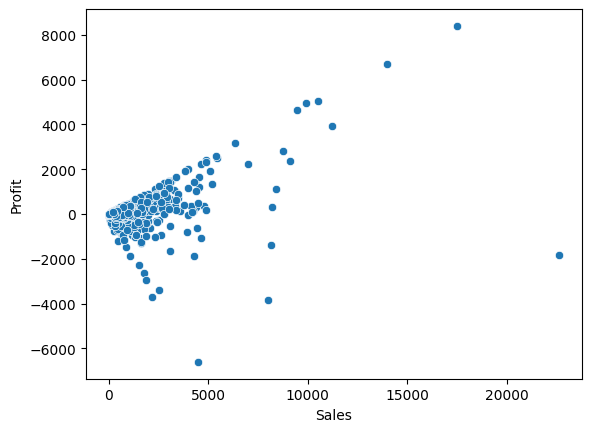

In [32]:
# usamos sns.scatterplot(x='ColumnName1', y='ColumnName2', data=df) para graficar un scatterplot de dos columnas específicas
sns.scatterplot(x='Sales', y='Profit', data=df)


In [33]:
# usamos sns.heatmap(df.corr(), annot=True) para graficar un heatmap de las correlaciones entre las columnas numéricas del DataFrame
plt.figure(figsize=(10, 8)) 


<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>